# 領域分割処理



## グラフカット法

画像処理における **グラフカット法（Graph Cuts）** は主に画像のセグメンテーションに使われる最適化手法の1つで、画像を前景と背景などに分割するために用いられる。

領域項（データ項）と境界項（平滑化項）と呼ばれる2つの項からなるコスト関数$E(L)$

$$
E(L)= R(L) + \lambda \cdot B(L)
$$

を最小化する

$$
\begin{aligned}
R(L)&=\sum_{p\in P} R_p(L_p) \\
B(L)&=\sum_{\{p, q\} \in N} B_{\{p, q\}} \cdot \delta(L_p, L_q)
\\
\delta(L_p, L_q) &= \begin{cases}1 & (L_p \neq L_q) \\
0 & (\text { それ以外 })\end{cases}
\end{aligned}
$$

- $P$：画素の全集合、$p$は1画素
- $N$：隣接する画素同士の組の全集合、$\{p, q\}$はその要素
- $\lambda$：領域項と境界項の相対的な重み。$\lambda \geq 0$
- $L$：ラベル（前景・背景）


[グラフカット（Graph Cut） - 大人になってからの再学習](https://zellij.hatenablog.com/entry/20131004/p1)

### GrabCut

Graph Cut を改良した半自動の画像セグメンテーション手法。

GrabCutは2004年にMicrosoft Researchによって提案された（Rother et al., 2004）。

特徴：

- 最初に矩形で前景をざっくり指定するだけで良い。
- 背景/前景の色分布を **GMM（Gaussian Mixture Model）** でモデル化。
- Graph Cut を使って、GMMに基づくエネルギー関数を反復的に最小化する。



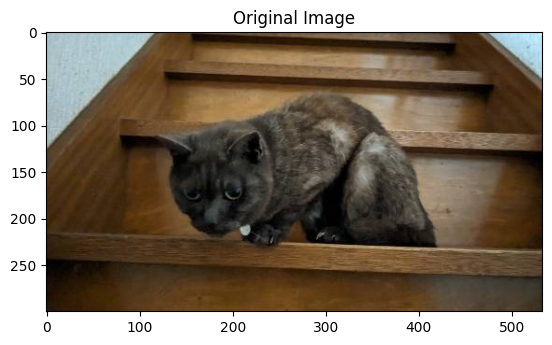

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("sample_images/cat2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.show()

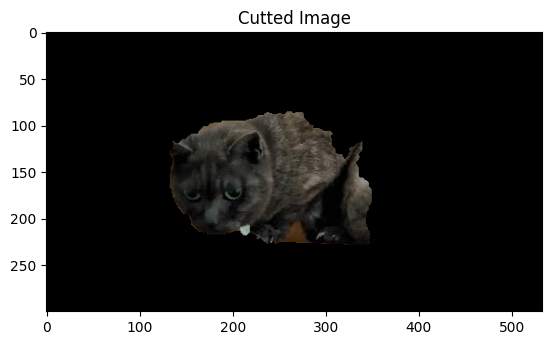

In [23]:
mask = np.zeros(img.shape[:2], np.uint8)

# 背景・前景モデル（内部的に使われる）
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 矩形で前景をざっくり指定
rect = (50, 50, 300, 400)

# GrabCutの実行
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# マスクの整形
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
result = img * mask2[:, :, np.newaxis]

plt.imshow(result)
plt.title("Cutted Image")
plt.show()